# TP Nº 1 - ANALISIS DEL SET DE DATOS DE NAVENT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#Funcion que pasa a formato datetime las fechas que recibimos.
def datetime(date,format_string):
    return pd.to_datetime(date,format= format_string,errors='coerce')
    

In [6]:
#Funcion que limpia los datos, quedandose con el nivel de educacion mas alto de casa id de los postulantes.
def education_cleaning(df):
    education_dic= {'Secundario': 1, 'Universitario':3,'Terciario/Técnico':2, 'Otro':0, 'Posgrado':4,\\
                    'Master': 5, 'Doctorado': 6}
    df['nombre_sort'] = df['nombre'].map(education_dic)
    df = df.sort_values(by='nombre_sort', ascending=False)
    df = df.drop_duplicates(subset='idpostulante',keep='first')
    return df

Leemos los datasets que nos dieron:

In [7]:
data_postulant_education= pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
data_postulant_education.head()


,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [8]:
data_postulation= pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
data_postulation.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [9]:
data_postulant_sex_age= pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
data_postulant_sex_age.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [10]:
data_views =  pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
data_views.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [11]:
data_ads_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
data_ads_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [12]:
data_ads_details= pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
data_ads_details.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# ARRANCAMOS CON LOS ANALISIS:

## 1) Analisis general de los postulantes:

### 1.1 Analisis de la edad de los postulantes

In [13]:
#Vemos cuantas fechas incorrectas hay
data_postulant_sex_age["fechanacimiento"].isnull().value_counts()

False    196138
True       4750
Name: fechanacimiento, dtype: int64

In [14]:
#Cambiamos el formato a datetime y dropeamos las incorrectas
data_postulant_sex_age["fechanacimiento"] = datetime(data_postulant_sex_age["fechanacimiento"],'%Y-%m-%d')

In [15]:
#Nos quedamos con las fechas que nos interesan 
ages = data_postulant_sex_age[(data_postulant_sex_age["fechanacimiento"].dt.year>1948) &\\
                              (data_postulant_sex_age["fechanacimiento"].dt.year<2000)]

#Calculamos la edad aproximadamente de los postulantes
years = ages["fechanacimiento"].map(lambda x: 2018 - x.year)

In [16]:
#Nos quedamos con las mujeres que cumplen el rango de edad que queremos
ages_fem = ages[ages["sexo"] == "FEM"]

#Calculamos la edad para cada uno
ages_fem = ages_fem["fechanacimiento"].map(lambda x: 2018 - x.year)

#Idem para los hombres
ages_masc = ages[ages["sexo"] == "MASC"]
ages_masc = ages_masc["fechanacimiento"].map(lambda x: 2018 - x.year)

In [17]:
#Importamos seaborn para poder graficar histogramas
import seaborn as sns
sns.set(color_codes=True)

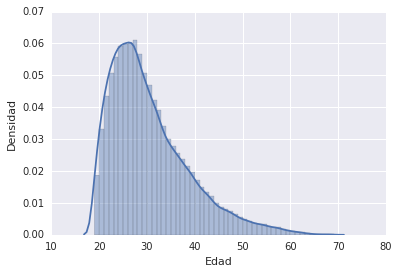

In [18]:
ax = sns.distplot(years)
ax.set_ylabel('Densidad')
ax.set_xlabel("Edad")
plt.show()

### 1.2 Analisis del género de los postulantes.

In [19]:
#Verificamos si hay nulls
data_postulant_sex_age['sexo'].isnull().value_counts()

False    200888
Name: sexo, dtype: int64

In [20]:
#Borramos los postulantes que en el campo 'sexo' tienen un NO_DECLARA porque no sirve para el analisis
data_postulant_sex_age = data_postulant_sex_age.drop(data_postulant_sex_age[ \\
                        data_postulant_sex_age['sexo'] == 'NO_DECLARA'].index)
data_postulant_sex_age.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


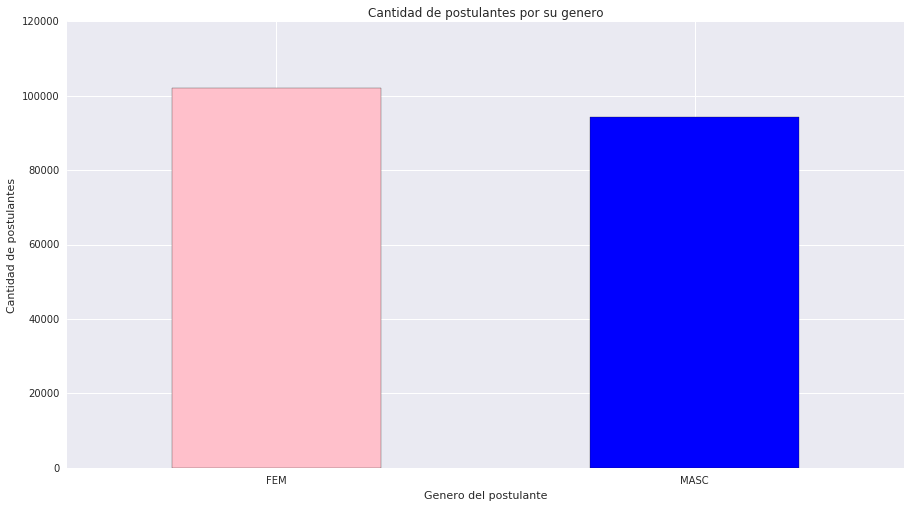

In [21]:
#Grafico de barras para ver la cantidad de postulantes que hay segun su sexo
data_postulant_sex_age.groupby('sexo').count()['idpostulante']\\
.plot(kind = 'bar', figsize=(15,8),title='Cantidad de postulantes por su genero',color = ['pink','blue','yellow'],rot=0);
ax=plt.gca()
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel('Genero del postulante')
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('CantidadDePostulantesSegunSuGenero.png',bbox_inches='tight')

### 1.3 Analisis de las edades por sexo.

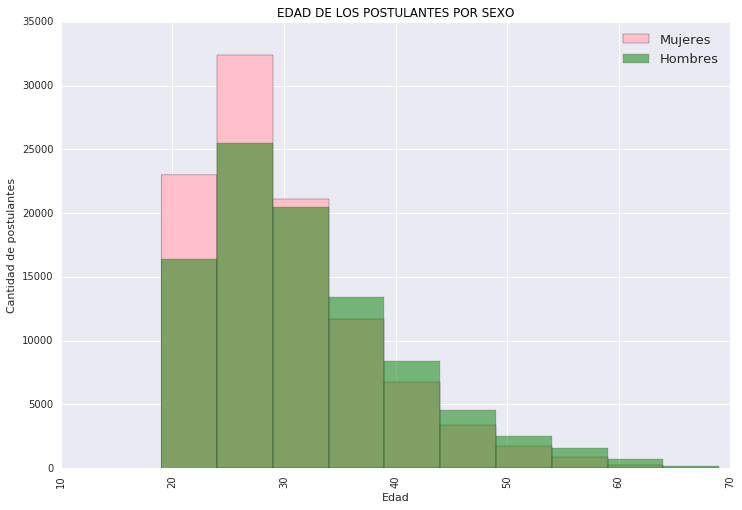

In [22]:
#Graficamos la cantidad de postulantes segun su edad y separado segun su sexo
plt.title ('EDAD DE LOS POSTULANTES POR SEXO',color='black')

ax = ages_fem.plot(kind='hist',rot=90,figsize=(12,8),color="pink", label = "Mujeres" ) 

ages_masc.plot(kind='hist',rot=90,figsize=(12,8),color="green", alpha = 0.5, label = "Hombres" )

ax.legend(fontsize=13)
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Edad")
plt.show()

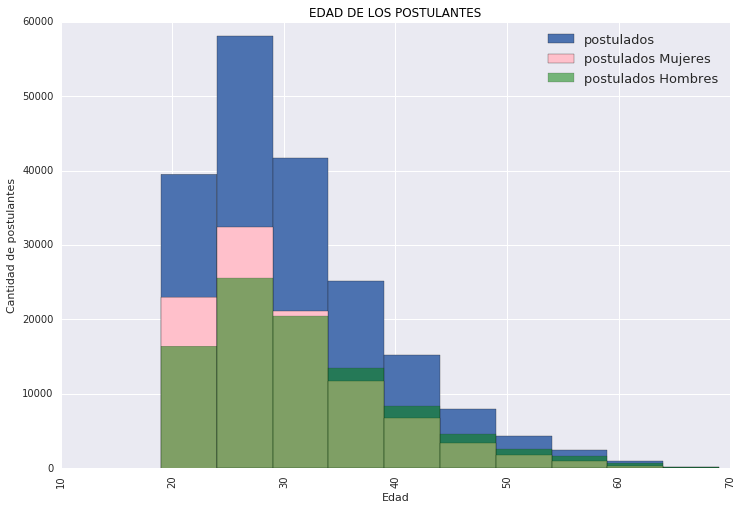

In [23]:
#Ahora igual que antes pero agregando el total de postulantes, la suma de los hombres y mujeres.
plt.title ('EDAD DE LOS POSTULANTES',color='black')

ax = years.plot(kind='hist',rot=90,figsize=(12,8), label = "postulados")

ages_fem.plot(kind='hist',rot=90,figsize=(12,8),color="pink" , label = "postulados Mujeres") 

ages_masc.plot(kind='hist',rot=90,figsize=(12,8),color="green", alpha = 0.5 , label = "postulados Hombres")

ax.legend(fontsize=13)
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Edad")
plt.show()

#### Distribucion de la edad segun su sexo. Otro grafico para veo otro enfoque

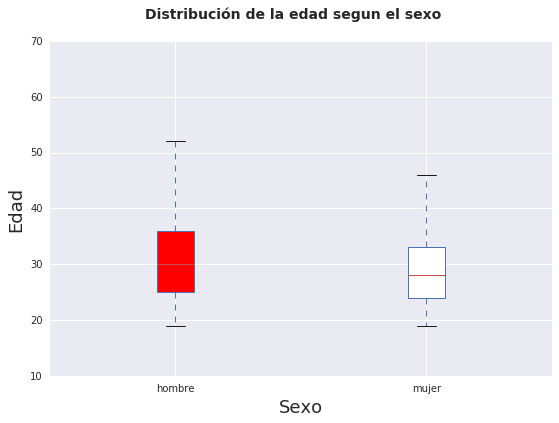

In [24]:
data = [ages_masc,ages_fem]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data, patch_artist=True)

bp["boxes"][0].set(facecolor = "red")
fig.suptitle('Distribución de la edad segun el sexo', fontsize=14, fontweight='bold')
ax.set_ylabel('Edad',size=18)
ax.set_xlabel('Sexo',size=18)
plt.xticks([1, 2], ['hombre', 'mujer'])
plt.show()

## 2) Analisis Top 10 Areas:

### 2.1 Análisis de las 10 áreas con más postulaciones

In [25]:

id_ads = data_postulation["idaviso"]
id_counts = id_ads.value_counts()
id_counts_frame = id_counts.to_frame()
id_counts_frame = id_counts_frame.reset_index()
id_counts_frame.rename(columns={'idaviso':'count', 'index':'idaviso'}, inplace = True)
result = pd.merge(id_counts_frame, data_ads_details, how='left', on="idaviso")
result_postulation_area = result.groupby(["nombre_area"],sort =True)["count"].sum()

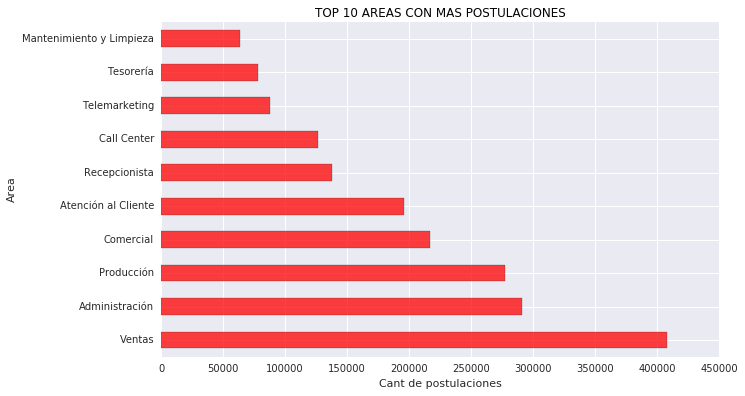

In [26]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('TOP 10 AREAS CON MAS POSTULACIONES',color='black')

result_postulation_area_top_10 = result_postulation_area.sort_values()[-10:]

ax = result_postulation_area_top_10[::-1]\\
.plot(kind='barh', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('Cant de postulaciones')
ax.set_ylabel("Area")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Top10AreasConMasPostulaciones.png',bbox_inches='tight')


### 2.2 Análisis de las 10 áreas con más publicaciones o avisos

In [27]:
publication_area = data_ads_details["nombre_area"].value_counts()

In [28]:
top10_publication_area = publication_area[:10]
top10_publication_area 

Ventas                   1659
Comercial                 983
Administración            901
Producción                821
Programación              576
Contabilidad              416
Tecnologia / Sistemas     388
Atención al Cliente       347
Mantenimiento             324
Recursos Humanos          235
Name: nombre_area, dtype: int64

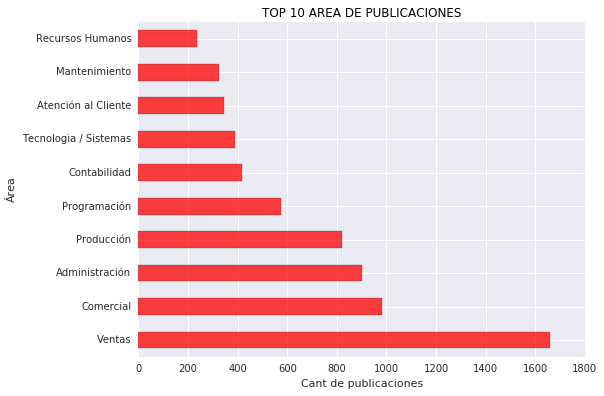

In [29]:
#Graficamos el top 10 de las areas de las que mas se publican trabajos.
f = plt.figure()

plt.title ('TOP 10 AREA DE PUBLICACIONES',color='black')

ax = top10_publication_area.plot(kind='barh', stacked=True, figsize=(8,6) ,alpha=0.75, ax=f.gca(), color='red')


ax.set_xlabel('Cant de publicaciones')
ax.set_ylabel("Área")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Top10AreasSegunCantidadPublicaciones.png',bbox_inches='tight')

## 3) Análisis del tipo de trabajo:

### 3.1 Análisis por tipo de trabajo ofrecido en los avisos

In [30]:
#Verificamos si hay null para limpiarlos
data_ads_details['tipo_de_trabajo'].isnull().value_counts()

False    13534
Name: tipo_de_trabajo, dtype: int64

In [31]:
#agrupamos segun tipo_de_trabajo
type_ads = data_ads_details.groupby('tipo_de_trabajo')['idaviso'].count().sort_values()

In [32]:
#contamos cuantos avisos hay para cada tipo de trabajo
type_ads = data_ads_details['tipo_de_trabajo'].value_counts()

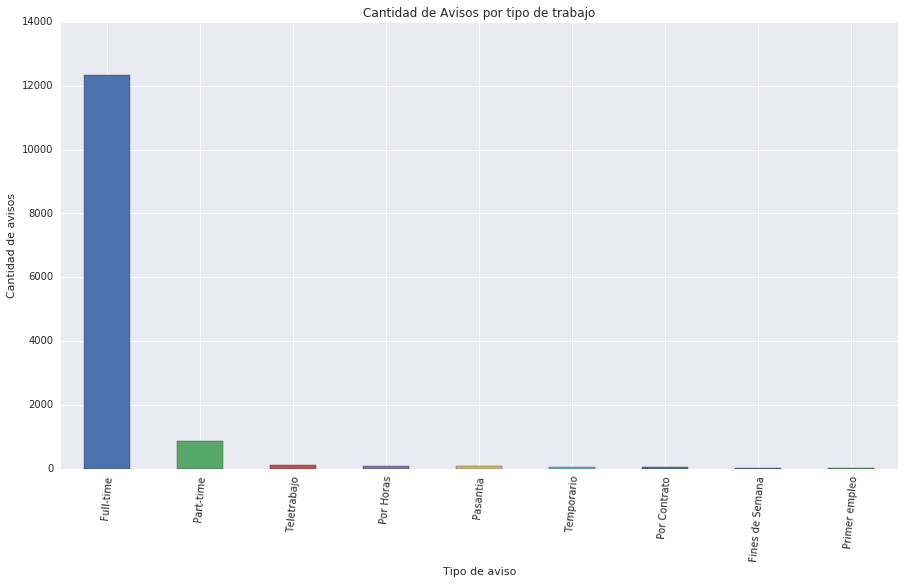

In [33]:
#Grafico de barra de la cantidad de avisos que se publican para cada tipo de trabajo
type_ads.plot(kind='bar',figsize=(15,8),rot=85,title='Cantidad de Avisos por tipo de trabajo');
ax=plt.gca()
ax.set_ylabel('Cantidad de avisos')
ax.set_xlabel('Tipo de aviso')
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('CantidadDeAvisosPorTipoDeTrabajo.png',bbox_inches='tight')

Como podemos ver hay una gran diferencia entre la cantidad de avisos que hay para trabajos *Full-Time* contra el resto de tipo de trabajos. Como no se aprecia mucho la diferencia entre los que tienen poca cantidad de anuncios, vamos a hacer otra visualizacion con escala logaritmica.

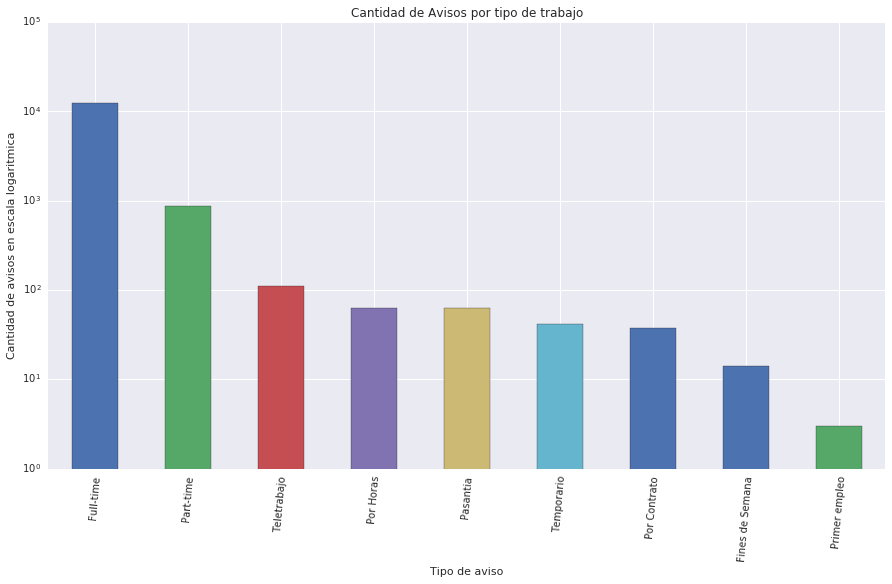

In [34]:
#Idem pero agregamos la escala logaritmica, para diferenciar los mas chicos.
type_ads.plot(kind='bar',figsize=(15,8),rot=85,logy = True,title='Cantidad de Avisos por tipo de trabajo');
ax=plt.gca()
ax.set_ylabel('Cantidad de avisos en escala logaritmica')
ax.set_xlabel('Tipo de aviso')
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('CantidadDeAvisosPorTipoDeTrabajoLog.png',bbox_inches='tight')

### 3.2 Análisis de la búsqueda de trabajo part-time en función de la    edad

In [35]:
#Limpiamos los datos
data_ads_details['tipo_de_trabajo'].isnull().value_counts()

False    13534
Name: tipo_de_trabajo, dtype: int64

In [36]:
#Nos fijamos la cantidad de avisos para cada tipo de trabajo
data_ads_details['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Por Horas             63
Pasantia              63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

In [37]:
#Limpieza de datos
data_postulant_sex_age['fechanacimiento'].isnull().value_counts()

False    195687
True        633
Name: fechanacimiento, dtype: int64

In [38]:
data_postulant_sex_age['fechanacimiento2'] = datetime(data_postulant_sex_age['fechanacimiento'],'%Y-%m-%d')
data_postulant_sex_age['fechanacimiento2'].dropna()

0        1970-12-03
1        1962-12-04
2        1978-08-10
3        1969-05-09
4        1981-02-16
5        1968-12-18
6        1966-07-16
7        1976-07-21
8        1976-02-28
9        1981-03-09
10       1973-02-13
11       1963-04-09
12       1967-01-30
13       1977-07-16
14       1973-09-11
15       1954-08-30
16       1959-01-05
17       1976-09-03
18       1964-01-19
19       1971-11-08
20       1974-05-06
21       1963-03-10
22       1966-05-30
23       1966-03-01
24       1969-07-17
25       1976-01-25
26       1966-06-29
27       1967-06-04
28       1979-03-24
29       1972-06-29
            ...    
200852   1997-01-05
200853   1999-06-24
200854   1997-10-02
200855   1999-07-24
200856   1988-05-31
200857   1995-05-14
200858   1982-04-15
200859   1977-04-06
200860   1998-10-02
200861   1996-07-08
200862   1988-01-01
200863   1994-03-02
200864   1995-07-05
200865   1990-03-21
200866   1990-08-25
200867   1997-07-22
200868   1996-04-26
200869   1988-08-26
200871   1999-08-10


In [39]:
#Busco un rango de edades entre 18 y 60 años

data_age1860 = data_postulant_sex_age[(data_postulant_sex_age['fechanacimiento2']\\
            .dt.year > 1957) & (data_postulant_sex_age['fechanacimiento2'].dt.year < 2000)]
data_age1860['edad'] = data_age1860['fechanacimiento2'].map(lambda x:2018-x.year)
data_age1860 = data_age1860[['idpostulante','edad']]
data_age1860.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,idpostulante,edad
0,NM5M,48
1,5awk,56
2,ZaO5,40
3,NdJl,49
4,eo2p,37


In [40]:
#Realizamos merge entre los postulantes entre 18 y 60 y sus postulaciones
postulations_age1860 = pd.merge(data_postulation,data_age1860, on='idpostulante')
postulations_age1860.head()

,idaviso,idpostulante,fechapostulacion,edad
0,1112257047,NM5M,2018-01-15 16:22:34,48
1,1111920714,NM5M,2018-02-06 09:04:50,48
2,1112346945,NM5M,2018-02-22 09:04:47,48
3,1112345547,NM5M,2018-02-22 09:04:59,48
4,1112237522,5awk,2018-01-25 18:55:03,56


In [41]:
#DataFrame que relaciona con los idavisos y tipo de trabajo
data_work_shift = data_ads_details[['idaviso','tipo_de_trabajo']]
data_work_shift.head()

,idaviso,tipo_de_trabajo
0,8725750,Full-time
1,17903700,Full-time
2,1000150677,Full-time
3,1000610287,Full-time
4,1000872556,Full-time


In [42]:
#Filtramos los part-time
data_part_time = data_work_shift[data_work_shift['tipo_de_trabajo'] == 'Part-time']
data_part_time.head()

,idaviso,tipo_de_trabajo
16,1110319893,Part-time
31,1110972814,Part-time
33,1111034663,Part-time
46,1111174081,Part-time
61,1111425609,Part-time


In [43]:
postulations_part_time_1860 = pd.merge(data_part_time,postulations_age1860, on='idaviso')
postulations_part_time_1860.head()

,idaviso,tipo_de_trabajo,idpostulante,fechapostulacion,edad
0,1111034663,Part-time,1qvlBO,2018-01-30 16:55:12,39
1,1111034663,Part-time,JBmqzN3,2018-01-31 12:47:57,26
2,1111034663,Part-time,dYo1Epa,2018-01-30 12:49:51,25
3,1111034663,Part-time,X9oR5PQ,2018-01-30 09:33:15,22
4,1111034663,Part-time,KBe1xWQ,2018-02-06 11:53:38,22


In [44]:
part_time_1860 = postulations_part_time_1860.groupby('edad').count()
part_time_1860.head()

,idaviso,tipo_de_trabajo,idpostulante,fechapostulacion
edad,,,,
19,13982,13982,13982,13982
20,23858,23858,23858,23858
21,30928,30928,30928,30928
22,33521,33521,33521,33521
23,31398,31398,31398,31398


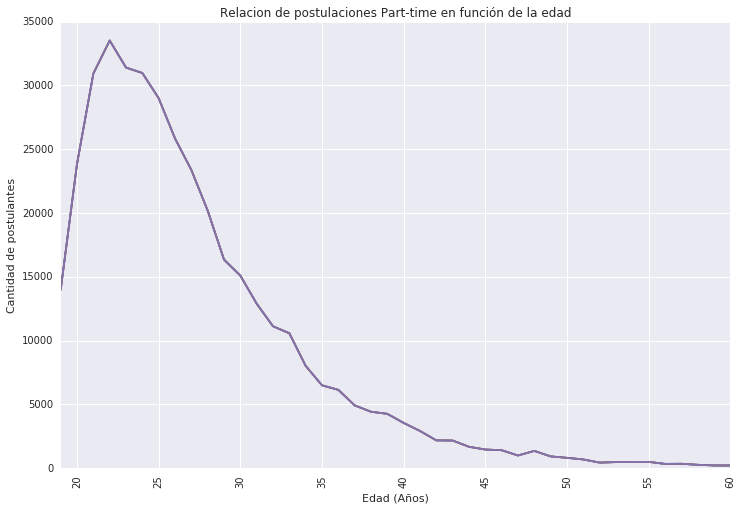

In [45]:
ax = part_time_1860.plot(kind='line',rot=90,figsize=(12,8), legend=False)
plt.title ('Relacion de postulaciones Part-time en función de la edad')

ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Edad (Años)")
plt.savefig('Part-timeEdad.png', bbox_inches='tight') 
#plt.show()


#part_time_1860_graph = part_time_1860.plot(kind='line',title= 'Relacion de postulaciones Part-time en función de la edad', legend= False)
#part_time_1860_graph.set_xlabel('Edad (Anios)')
#part_time_1860_graph.set_ylabel('Cant de postulaciones');
#part_time_1860_graph.savefig('Part-TimeEdad.png', bbox_inches='tight')

## 4) Analisis segun el tiempo:

### 4.1 Análisis de las postulaciones según el mes de febrero.

In [46]:
#Limpiamos los datos y los convertimos a datetime
data_postulation["fechapostulacion"] = datetime(data_postulation["fechapostulacion"],'%Y-%m-%d')
data_postulation["fechapostulacion"] = data_postulation["fechapostulacion"].dropna()

In [47]:
#Buscamos los datos del mes de febrero
february = data_postulation[data_postulation['fechapostulacion'].dt.month == 2] 
february_days = february.groupby(february['fechapostulacion'].dt.day)['fechapostulacion'].count()
february_days.head()

fechapostulacion
1    77554
2    69328
3    32543
4    35350
5    91680
Name: fechapostulacion, dtype: int64

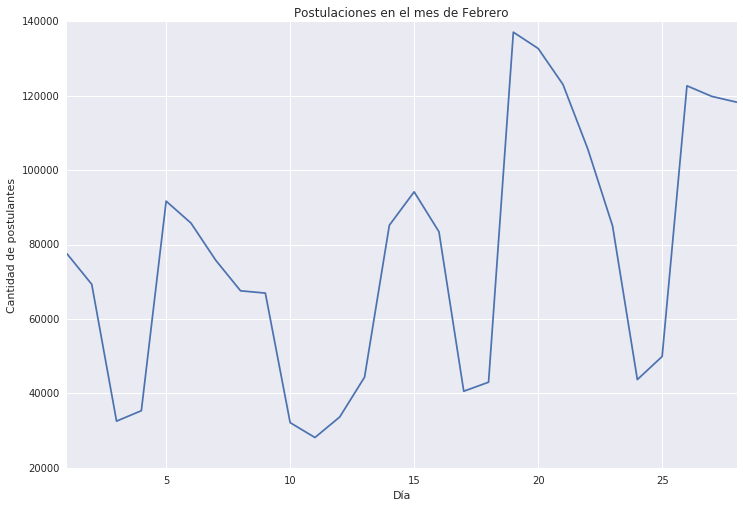

In [48]:
ax = february_days.plot(kind='line',rot=0,figsize=(12,8), legend=False)
plt.title ('Postulaciones en el mes de Febrero')

ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Día")
plt.savefig('FebruaryPostulations.png', bbox_inches='tight') 
#plt.show()

#february_graph = february_days.plot(kind='line',title= 'Postulaciones en febrero')
#february_graph.set_xlabel('Dia')
#february_graph.set_ylabel('Postulaciones');

### 4.2 Análisis de las postulaciones por fines de semanas de febrero.

In [49]:
#paso las fecha a formato datetime
data_postulation["fechapostulacion"] = datetime(data_postulation["fechapostulacion"],'%Y-%m-%d')

In [50]:
#me quedo con los datos que pertenecen a los finde semanas de febrero
weekend_postulation = data_postulation[((data_postulation["fechapostulacion"].dt.weekday == 6 ) | \\
(data_postulation["fechapostulacion"].dt.weekday == 5)) & (data_postulation["fechapostulacion"].dt.month == 2)]
weekend_postulation.head()

,idaviso,idpostulante,fechapostulacion
10,1112303543,5awk,2018-02-18 23:49:34
26,1112309589,ZaO5,2018-02-03 15:55:15
29,1112327122,ZaO5,2018-02-11 17:49:26
30,1112315062,ZaO5,2018-02-11 18:08:14
55,1112334932,NdJl,2018-02-17 16:17:35


In [51]:
#agrego una columna que contiene a que finde semana de febrero pertence la fecha, por ej 1 es el primer finde 
#semana de febrero
dic_weekend = {3:1 , 4:1 , 10: 2 , 11:2 , 17:3 , 18:3 , 24:4 , 25:4 }
weekend_postulation["findedesemana"] = weekend_postulation["fechapostulacion"].map(lambda x: dic_weekend[x.day])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


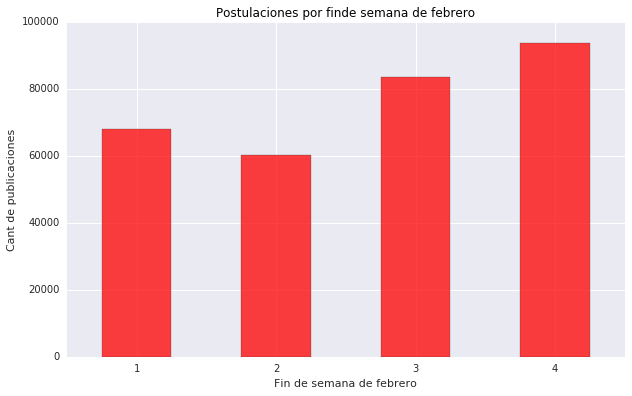

In [52]:
#Graficamos la cantidad de postulaciones segun el finde semana de febrero que sea
f = plt.figure()

plt.title ('Postulaciones por finde semana de febrero',color='black')

ax = weekend_postulation["findedesemana"].value_counts().sort_index()\\
.plot(kind='bar', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red', rot = 0)

ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Fin de semana de febrero")
plt.show()

### 4.3 Análisis de las postulaciones según la hora del día.

In [53]:
#Verificamos si hay nulls
data_postulation['fechapostulacion'].isnull().value_counts()

False    3401623
Name: fechapostulacion, dtype: int64

In [54]:
#agrego una columna que indica la hora del dia en que se postularon, no considero minutos ni segundos
data_postulation['fechapostulacion'] = datetime(data_postulation['fechapostulacion'],'%Y-%m-%d %H:%M')
data_postulation['Hora'] = data_postulation['fechapostulacion'].dt.hour
data_postulation.head()

,idaviso,idpostulante,fechapostulacion,Hora
0,1112257047,NM5M,2018-01-15 16:22:34,16
1,1111920714,NM5M,2018-02-06 09:04:50,9
2,1112346945,NM5M,2018-02-22 09:04:47,9
3,1112345547,NM5M,2018-02-22 09:04:59,9
4,1112237522,5awk,2018-01-25 18:55:03,18


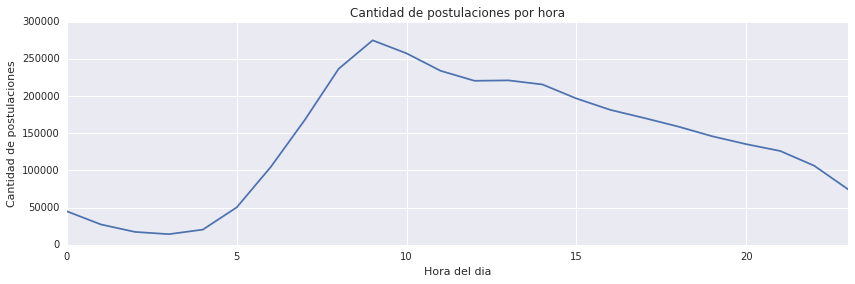

In [55]:
#Grafico que muestra como aumentan o disminuyen la cantidad de postulaciones segun la hora del dia
data_postulation.groupby('Hora').count()['idpostulante'].plot(figsize=(14,4),title='Cantidad de postulaciones por hora');
ax=plt.gca()
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Hora del dia')
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('CantidadDePostulacionPorHora.png',bbox_inches='tight')


### 4.4 Análisis de las visitas a anuncios por hora.

In [56]:
#Cambiamos de formato timestamp a datetime
data_views['timestamp'] = pd.to_datetime(data_views['timestamp'], format = "%Y-%m-%dT%H:%M:%S",errors = 'coerce')
data_views.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP


In [57]:
#Ordeno horarios de las visitas de los  avisos 
data_hours = data_views['timestamp'].dt.hour
hours_of_a_day = data_hours.value_counts().sort_index()
hours_of_a_day.head(24)

0     45966
1     44273
2     41101
3     35716
4     22249
5     11966
6      7487
7      4550
8      4445
9      5957
10    18679
11    36364
12    50213
13    60972
14    66168
15    63737
16    56415
17    54704
18    56568
19    59214
20    58042
21    53928
22    51527
23    51656
Name: timestamp, dtype: int64

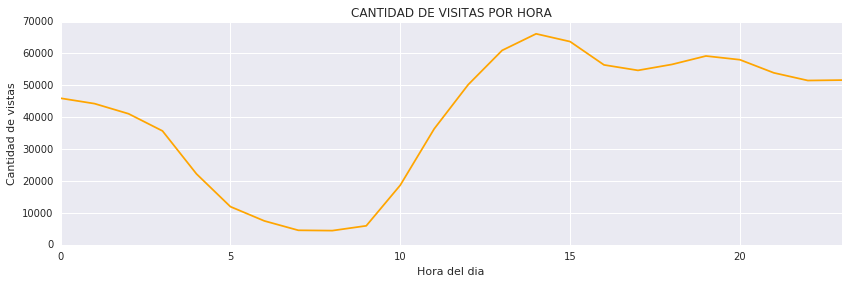

In [58]:
#Graficamos las cantidad de visitas a lo largo del dia
hours_of_a_day.plot(figsize=(14,4),title='CANTIDAD DE VISITAS POR HORA', color = 'orange');
ax=plt.gca()
ax.set_ylabel('Cantidad de vistas')
ax.set_xlabel('Hora del dia')
#plt.show()
plt.savefig('Horarios de visitas.png',bbox_inches='tight')

### 4.5 Análisis de el área con mas vistas en el rango horario más visitado.

In [59]:
#me quedo con las visitas en el rango horario de 12 a 20 y calcuo el area mas visitada
data_views1220 = data_views[(data_views['timestamp'].dt.hour > 12) & (data_views['timestamp'].dt.hour < 20)]
data_views1220.columns = ['idaviso','timestamp','idpostulante']
data_views1220 = pd.merge(data_views1220,data_ads_details,on='idaviso')
data_views1220['nombre_area'].value_counts().head()

Ventas                 53556
Administración         48841
Producción             27862
Comercial              25296
Atención al Cliente    21392
Name: nombre_area, dtype: int64

*TRABAJO CON MAS VISTAS EN EL HORARIO DE 12 A 20*

In [60]:
#titulo de trabajo con mas vistas entre las 12 y 20
data_views1220['titulo'].value_counts().head()

Recepcionista Administrativa                                      2151
Administrativo General Para Importante Obra social                1776
Representantes de Atención al Cliente Part Time Mañana y Tarde    1683
Recepcionista/Asistente Administrativa                            1615
Cajero de Sucursal - Contrato a Plazo Fijo                        1506
Name: titulo, dtype: int64

### 4.6 Análisis de la publicación con mas visitas en el rango horario más visitado.

In [61]:
#me quedo con las postulaciones en el rango de horarios de 12 a 20
data_postulation['fechapostulacion'] = pd.to_datetime(data_postulation['fechapostulacion'],\\
                                        format = '%Y-%m-%d %H:%M:%S',errors = 'coerce')
data_postulation1220 = data_postulation[(data_postulation['fechapostulacion'].dt.hour > 12) &\\
                                        (data_postulation['fechapostulacion'].dt.hour < 20)]
data_postulation1220.head()

,idaviso,idpostulante,fechapostulacion,Hora
0,1112257047,NM5M,2018-01-15 16:22:34,16
4,1112237522,5awk,2018-01-25 18:55:03,18
5,1112277633,5awk,2018-01-29 13:34:44,13
12,1112315188,5awk,2018-02-28 15:54:28,15
13,1112346738,5awk,2018-02-28 15:54:47,15


In [62]:
#avisos con mas postulaciones en el rango de horario 12 a 20
data_postulation1220['idaviso'].value_counts().head(20)

1112345900    3539
1112334791    3324
1112319451    3024
1112033906    2852
1112204682    2848
1112262494    2618
1112296264    2553
1112094756    2493
1112316288    2480
1112298966    2374
1112349037    2353
1112334788    2317
1112260584    2249
1112305277    2189
1112280937    2155
1112347329    2058
1112303105    2032
1112307266    2011
1112344973    1948
1112293625    1948
Name: idaviso, dtype: int64

## 5) Análisis del nivel de educación:

### 5.1 Análisis por nivel educativo de los postulantes.

In [63]:
#Verificamos que no haya NaNs en la columna 'nombre' del data frame data_postulant_education (para limpiar los datos):
data_postulant_education['nombre'].isnull().value_counts()

False    298231
Name: nombre, dtype: int64

In [64]:
#Limpiamos los datos de la educacion de los postulantes, donde un mismo postulante tenia distintos 
#niveles educativos (nos quedamos con el mas alto)
postulant_education = education_cleaning(data_postulant_education)
postulant_education = postulant_education['nombre'].value_counts()
postulant_education

Universitario        87838
Secundario           62411
Terciario/Técnico    27429
Posgrado              6050
Master                3475
Otro                  1338
Doctorado              211
Name: nombre, dtype: int64

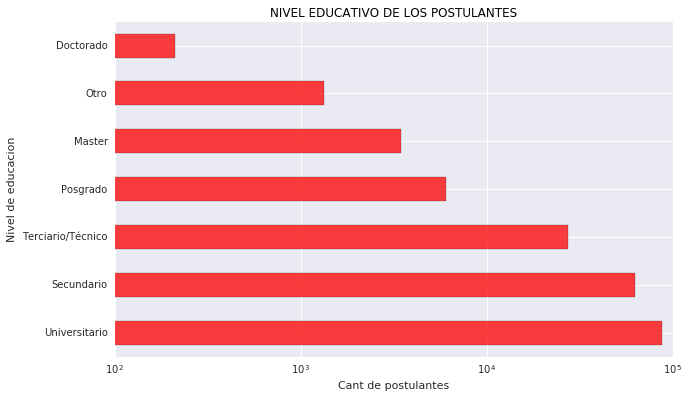

In [65]:
#Graficamos la cantidad de postulantes segun su nivel educativo
f = plt.figure()

plt.title ('NIVEL EDUCATIVO DE LOS POSTULANTES',color='black')

ax = postulant_education.plot(kind='barh', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red', logx= True )


ax.set_xlabel('Cant de postulantes')
ax.set_ylabel("Nivel de educacion")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('CantidadDePostulantesSegunNivelEducativo.png',bbox_inches='tight')

### 5.2 Análisis de la cantidad de postulaciones en cada tipo de trabajo en alumnos universitarios.

In [66]:
data_ads_details['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Por Horas             63
Pasantia              63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

In [67]:
#Limpieza de datos
data_education = education_cleaning(data_postulant_education)

In [68]:
#Filtramos por alumnos universitarios y siguen en curso  
univ_not_finished = data_postulant_education[(data_postulant_education['nombre']=='Universitario') &\\
                                             (data_postulant_education['estado']=='En Curso')]
univ_not_finished.head()

,idpostulante,nombre,estado,nombre_sort
1,8BkL,Universitario,En Curso,3
2,1d2B,Universitario,En Curso,3
3,NPBx,Universitario,En Curso,3
8,Y043Z,Universitario,En Curso,3
9,6M3jr,Universitario,En Curso,3


In [69]:
#Filtramos por postulantes en el rango de edades de 18 a 16
data_postulant_sex_age['fechanacimiento'] = pd.to_datetime(data_postulant_sex_age['fechanacimiento'],\\
                                            format = '%Y-%m-%d',errors = 'coerce')
data_age1826 = data_postulant_sex_age[(data_postulant_sex_age['fechanacimiento'].dt.year > 1992) &\\
                                      (data_postulant_sex_age['fechanacimiento'].dt.year < 2000)]
data_age1826.head()

,idpostulante,fechanacimiento,sexo,fechanacimiento2
2272,NzqmoV,1995-01-16,FEM,1995-01-16
6821,65lY6R,1993-09-13,FEM,1993-09-13
7988,ZrzORR,1998-05-02,FEM,1998-05-02
9855,8V5rEj,1993-02-24,FEM,1993-02-24
11127,epMXVj,1994-05-18,MASC,1994-05-18


In [70]:
#Merge entre ambas tablas anteriores
univ_age = pd.merge(univ_not_finished,data_age1826, on='idpostulante')
univ_age.head()

,idpostulante,nombre,estado,nombre_sort,fechanacimiento,sexo,fechanacimiento2
0,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24
1,NWzZmD,Universitario,En Curso,3,1996-02-19,MASC,1996-02-19
2,a83VGJ,Universitario,En Curso,3,1995-09-26,FEM,1995-09-26
3,ND46Px,Universitario,En Curso,3,1993-09-26,FEM,1993-09-26
4,Z054eR,Universitario,En Curso,3,1993-01-20,MASC,1993-01-20


In [71]:
#DataFrame que relaciona con los idavisos y tipo de trabajo
data_details = data_ads_details[['idaviso','tipo_de_trabajo']]
data_details.head()

,idaviso,tipo_de_trabajo
0,8725750,Full-time
1,17903700,Full-time
2,1000150677,Full-time
3,1000610287,Full-time
4,1000872556,Full-time


In [72]:
#Merge entre las tablas anteriores
avisos_merge = pd.merge(data_details,data_postulation, on= 'idaviso')
avisos_merge.head()

,idaviso,tipo_de_trabajo,idpostulante,fechapostulacion,Hora
0,8725750,Full-time,4rWEjrA,2018-01-16 21:58:40,21
1,8725750,Full-time,qewD0aR,2018-02-06 15:51:54,15
2,8725750,Full-time,3N2dBdq,2018-02-08 10:49:43,10
3,8725750,Full-time,0zkx2dY,2018-02-07 06:32:25,6
4,8725750,Full-time,ZDrdPVR,2018-01-15 09:23:40,9


In [73]:
#Merge para obtener los postulantes universitarios en curso y el tipo de trabajo a postularse
final_merge = pd.merge(univ_age, avisos_merge, on='idpostulante')
final_merge.head(20)

,idpostulante,nombre,estado,nombre_sort,fechanacimiento,sexo,fechanacimiento2,idaviso,tipo_de_trabajo,fechapostulacion,Hora
0,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112216861,Part-time,2018-01-22 10:03:22,10
1,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112280067,Full-time,2018-01-30 12:42:05,12
2,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112286523,Full-time,2018-01-30 12:40:41,12
3,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112345893,Full-time,2018-02-27 10:53:06,10
4,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112293018,Full-time,2018-01-30 12:40:30,12
5,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112296264,Full-time,2018-01-30 12:39:35,12
6,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112355872,Full-time,2018-02-27 10:52:24,10
7,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112357818,Full-time,2018-02-27 10:51:59,10
8,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112260584,Part-time,2018-01-22 10:03:07,10
9,8V5rEj,Universitario,En Curso,3,1993-02-24,FEM,1993-02-24,1112337868,Full-time,2018-02-27 10:54:40,10


In [74]:
final_merge['tipo_de_trabajo'].value_counts()

Full-time          312106
Part-time           90148
Pasantia             6935
Temporario           1199
Por Horas            1116
Teletrabajo           526
Por Contrato          382
Fines de Semana       199
Primer empleo          31
Name: tipo_de_trabajo, dtype: int64

In [75]:
work_by_shift_times = final_merge['tipo_de_trabajo'].value_counts()
work_by_shift_times

Full-time          312106
Part-time           90148
Pasantia             6935
Temporario           1199
Por Horas            1116
Teletrabajo           526
Por Contrato          382
Fines de Semana       199
Primer empleo          31
Name: tipo_de_trabajo, dtype: int64

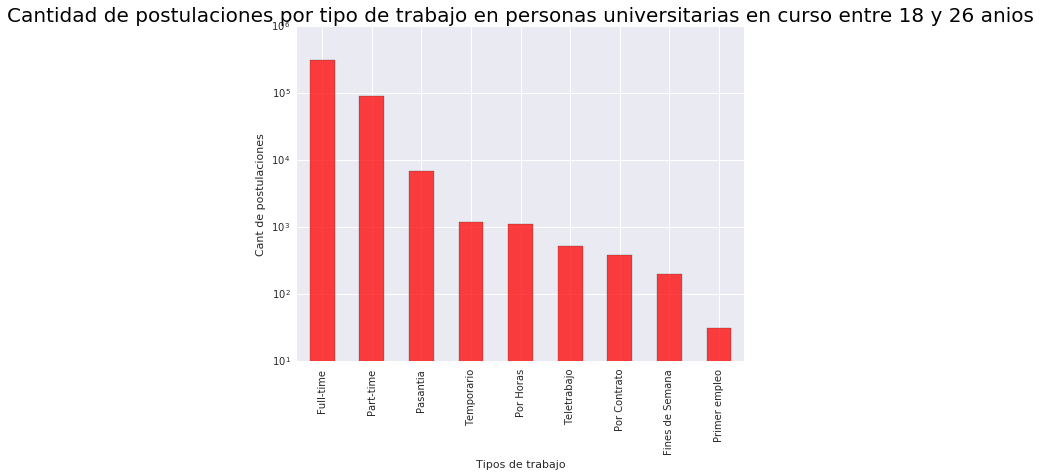

In [76]:
#Grafico obtenido 
final_merge_plot = plt.figure()

plt.title ('Cantidad de postulaciones por tipo de trabajo en personas universitarias en curso entre 18 y 26 anios',\\
           color='black', size = 20)

ax = work_by_shift_times.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, color='red', logy=True)


ax.set_ylabel('Cant de postulaciones')
ax.set_xlabel("Tipos de trabajo")
plt.show()

## 6) Analisis del nivel laboral:

In [89]:
data_ads_details['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

In [90]:
data_ads_details['nivel_laboral'].describe()

count                    13534
unique                       5
top       Senior / Semi-Senior
freq                      9407
Name: nivel_laboral, dtype: object

In [91]:
#Verificamos que no hayan datos nulos
data_ads_details['nivel_laboral'].isnull().value_counts()

False    13534
Name: nivel_laboral, dtype: int64

In [92]:
#me quedo con los postulantes de edades entre 18 y 69
data_postulant_sex_age['fechanacimiento'] = pd.to_datetime(data_postulant_sex_age['fechanacimiento'],\\
                                            format = '%Y-%m-%d',errors = 'coerce')
data_age1869 = data_postulant_sex_age[(data_postulant_sex_age['fechanacimiento'].dt.year > 1949) &\\
                                      (data_postulant_sex_age['fechanacimiento'].dt.year <= 2000)]
data_age1869['años'] = data_age1869['fechanacimiento'].map(lambda x: 2018 - x.year)
data_age1869.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,idpostulante,fechanacimiento,sexo,fechanacimiento2,años
0,NM5M,1970-12-03,FEM,1970-12-03,48
1,5awk,1962-12-04,FEM,1962-12-04,56
2,ZaO5,1978-08-10,FEM,1978-08-10,40
3,NdJl,1969-05-09,MASC,1969-05-09,49
4,eo2p,1981-02-16,MASC,1981-02-16,37


In [93]:
#nos creamos un dataframe que contenga para cada idaviso que tipo de nivel laboral es requerido
data_details1 = data_ads_details[['idaviso','nivel_laboral']]
data_details1.head()

,idaviso,nivel_laboral
0,8725750,Senior / Semi-Senior
1,17903700,Senior / Semi-Senior
2,1000150677,Senior / Semi-Senior
3,1000610287,Senior / Semi-Senior
4,1000872556,Senior / Semi-Senior


In [94]:
#nos quedamos con un cierto rango de edad. Mergeamos el dataframe que nos muestran las postulaciones 
#filtrandolo con el de las edades, quedando solo la informacion de las postulaciones del rango 
#de edades que queremos evaluar
postulations_from18_to69 = pd.merge(data_postulation,data_age1869, on='idpostulante')

#nos quedamos solo con los datos del aviso que se postulo, el postulante y su edad (que debe estar dentro del rango)
postulations_from18_to69 = postulations_from18_to69[['idaviso','idpostulante','años']]
postulations_from18_to69.head()

,idaviso,idpostulante,años
0,1112257047,NM5M,48
1,1111920714,NM5M,48
2,1112346945,NM5M,48
3,1112345547,NM5M,48
4,1112237522,5awk,56


In [95]:
#Mergeamos para obtener los detalles de los avisos a los que se postularon las personas del rango de edad pedida
final_merge1 = pd.merge(postulations_from18_to69,data_details1, on='idaviso')
final_merge1.head()

,idaviso,idpostulante,años,nivel_laboral
0,1112257047,NM5M,48,Otro
1,1112257047,1kJqGb,34,Otro
2,1112257047,eOE9Rr,39,Otro
3,1112257047,Zrx8Xz,40,Otro
4,1112257047,ZrKNQY,33,Otro


### 6.1  Análisis de postulaciones según el nivel laboral de edad 18 a 44 años.

In [77]:
#me quedo con los postulantes con edades de 18 a 44
data_age1844 = data_postulant_sex_age[(data_postulant_sex_age['fechanacimiento'].dt.year >= 1974) &\\
                                      (data_postulant_sex_age['fechanacimiento'].dt.year < 2000)]
data_age1844.head()

,idpostulante,fechanacimiento,sexo,fechanacimiento2
2,ZaO5,1978-08-10,FEM,1978-08-10
4,eo2p,1981-02-16,MASC,1981-02-16
7,8BkL,1976-07-21,FEM,1976-07-21
8,1d2B,1976-02-28,MASC,1976-02-28
9,NPBx,1981-03-09,MASC,1981-03-09


In [78]:
postulations_from18_to44 = pd.merge(data_postulation,data_age1844, on='idpostulante')


postulations_from18_to44 = postulations_from18_to44[['idaviso','idpostulante','fechanacimiento']]
postulations_from18_to44.head()

,idaviso,idpostulante,fechanacimiento
0,1112286523,ZaO5,1978-08-10
1,1112272060,ZaO5,1978-08-10
2,1112288401,ZaO5,1978-08-10
3,1112300563,ZaO5,1978-08-10
4,1112293018,ZaO5,1978-08-10


In [79]:
data_details2 = data_ads_details[['idaviso','nivel_laboral']]
data_details2.head()

,idaviso,nivel_laboral
0,8725750,Senior / Semi-Senior
1,17903700,Senior / Semi-Senior
2,1000150677,Senior / Semi-Senior
3,1000610287,Senior / Semi-Senior
4,1000872556,Senior / Semi-Senior


In [80]:
final_merge2 = pd.merge(postulations_from18_to44,data_details2, on='idaviso')
final_merge2.head()

,idaviso,idpostulante,fechanacimiento,nivel_laboral
0,1112286523,ZaO5,1978-08-10,Senior / Semi-Senior
1,1112286523,5kD2Pk,1983-07-29,Senior / Semi-Senior
2,1112286523,8Mv18l,1974-12-17,Senior / Semi-Senior
3,1112286523,aOoA2m,1979-01-21,Senior / Semi-Senior
4,1112286523,6Zwkj3,1975-02-05,Senior / Semi-Senior


In [81]:
#calculo edad de los postulantes
final_merge2['anios'] = final_merge2['fechanacimiento'].map(lambda x: 2018 - x.year)
final_merge2['nivel_laboral'].head()

0    Senior / Semi-Senior
1    Senior / Semi-Senior
2    Senior / Semi-Senior
3    Senior / Semi-Senior
4    Senior / Semi-Senior
Name: nivel_laboral, dtype: object

In [82]:
work_level2=final_merge2['nivel_laboral'].value_counts()

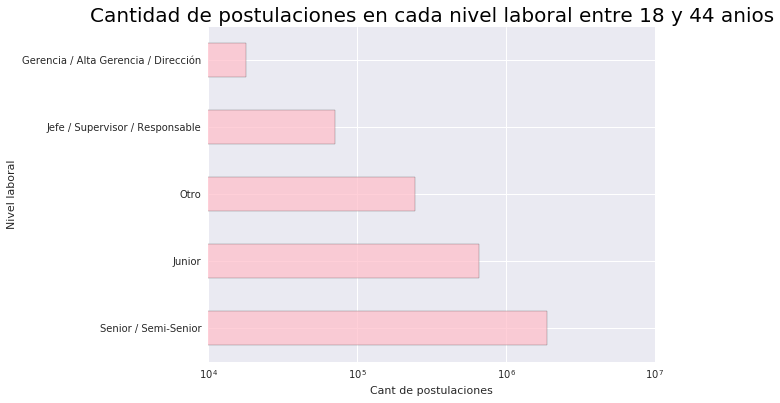

In [83]:
#Grafico obtenido 

fig = plt.figure()

plt.title ('Cantidad de postulaciones en cada nivel laboral entre 18 y 44 anios',color='black', size = 20)

ap1 = work_level2.plot(kind='barh', stacked=True, figsize=(8,6) ,alpha=0.75, color='pink', logx=True)


ap1.set_xlabel('Cant de postulaciones')
ap1.set_ylabel("Nivel laboral")
#plt.show()
plt.savefig('Cantidad de postulacion en cada nivel laboral 18 44.png',bbox_inches='tight')

### 6.2 Análisis de postulaciones según el nivel laboral de edad 45 a 69 años.

In [84]:
#repetimos para otro rango de edades mas acotado
data_details1 = data_ads_details[['idaviso','nivel_laboral']]
data_details1.head()

,idaviso,nivel_laboral
0,8725750,Senior / Semi-Senior
1,17903700,Senior / Semi-Senior
2,1000150677,Senior / Semi-Senior
3,1000610287,Senior / Semi-Senior
4,1000872556,Senior / Semi-Senior


In [101]:
postulations_from44_to69 = pd.merge(data_postulation,data_age1869, on='idpostulante')


postulations_from44_to69 = postulations_from18_to69[['idaviso','idpostulante','años']]
postulations_from44_to69.head()

,idaviso,idpostulante,años
0,1112257047,NM5M,48
1,1111920714,NM5M,48
2,1112346945,NM5M,48
3,1112345547,NM5M,48
4,1112237522,5awk,56


In [102]:
data4469 = pd.merge(postulations_from44_to69,data_details1, on='idaviso')
data4469.head()

,idaviso,idpostulante,años,nivel_laboral
0,1112257047,NM5M,48,Otro
1,1112257047,1kJqGb,34,Otro
2,1112257047,eOE9Rr,39,Otro
3,1112257047,Zrx8Xz,40,Otro
4,1112257047,ZrKNQY,33,Otro


In [103]:
work_level = final_merge1['nivel_laboral'].value_counts()

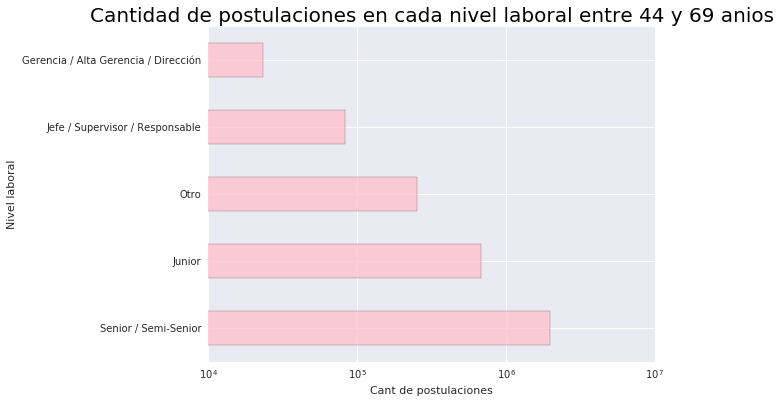

In [104]:
#Grafico obtenido 

fi = plt.figure()

plt.title ('Cantidad de postulaciones en cada nivel laboral entre 44 y 69 anios',color='black', size = 20)

ap = work_level.plot(kind='barh', stacked=True, figsize=(8,6) ,alpha=0.75, color='pink', logx=True)


ap.set_xlabel('Cant de postulaciones')
ap.set_ylabel("Nivel laboral")
plt.show()

### 6.3 Heatmap de las edades de los postulantes y nivel laboral.

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


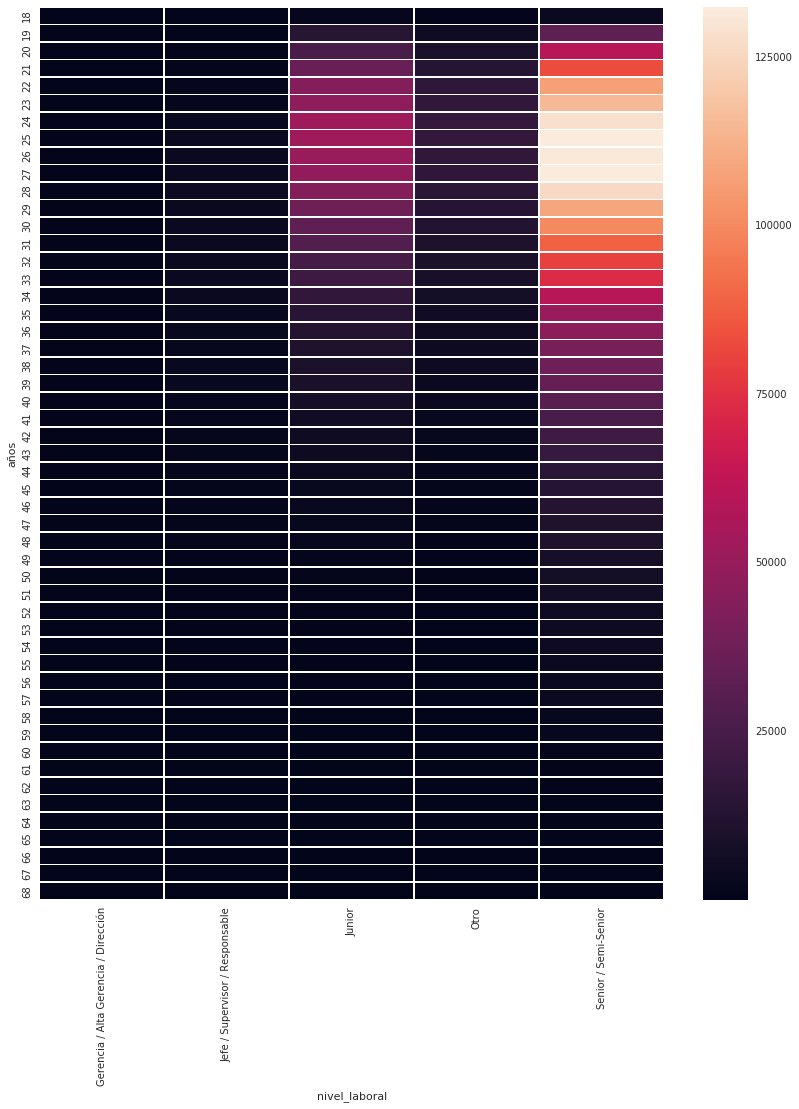

In [96]:
#Graficamos un heatmap para ver como se distribuyen las postulaciones segun edad y nivel laboral requerido por el aviso
from matplotlib.colors import LogNorm
final_merge1 = final_merge1[['nivel_laboral','años']]
final_merge2 = final_merge1.groupby(['nivel_laboral','años']).size().reset_index()
final_merge2.columns=['nivel_laboral','años','cantidad']
final_merge2 = final_merge2.pivot(index='años',columns='nivel_laboral',values='cantidad')
final_merge2.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(14,16))         # Sample figsize in inches
sns.heatmap(final_merge2,annot=False, linewidths=.5);
plt.savefig('Heatmap.png', bbox_inches='tight')
#norm=LogNorm(vmin=Z1.min(), vmax=Z1.max()
#ap1 = apc[apc['Operator'].isin(TopOperators)].groupby(['Operator','cluster']).size().reset_index()
#work_level = final_merge1['nivel_laboral'].value_counts()
#work_level

## 7) Analisis de las empresas:

### 7.1 Análisis de las empresas con más avisos online.

In [97]:
#Limpiamos los datos, eliminamos los nulos y un dato que vimos que la empresa era '-' lo cual nos parecio que no existia 
#realmente.
data_ads_details['denominacion_empresa'] = data_ads_details['denominacion_empresa'].dropna()
data_ads_details = data_ads_details.drop(data_ads_details[data_ads_details['denominacion_empresa'] == '-'].index)

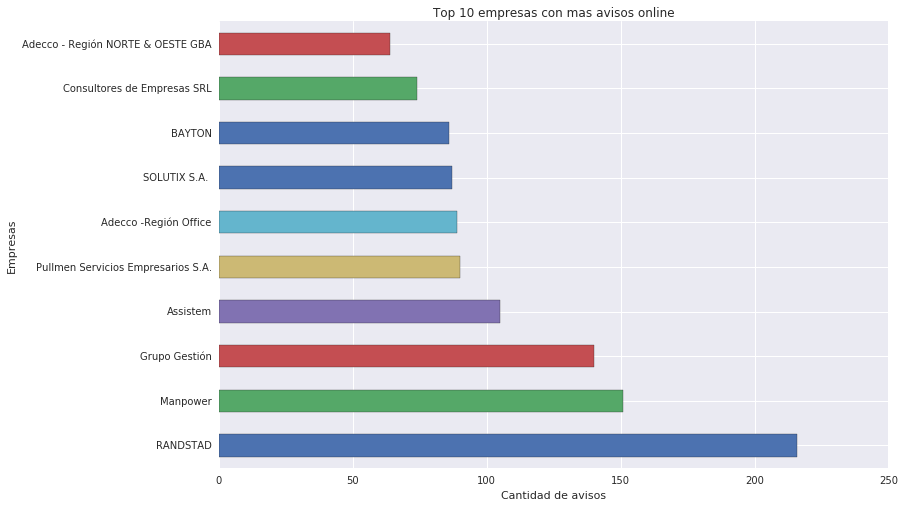

In [98]:
df_companies_online = data_ads_details[['idaviso','denominacion_empresa']]
df_companies_online = pd.merge(df_companies_online,data_ads_online, on ='idaviso')
df_companies_online = df_companies_online['denominacion_empresa'].value_counts().nlargest(10)

df_companies_online.plot(kind='barh',figsize=(12,8),rot=0,title='Top 10 empresas con mas avisos online');
ax=plt.gca()
ax.set_xlabel('Cantidad de avisos')
ax.set_ylabel('Empresas')
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Top10EmpresasMasAvisosOnline.png',bbox_inches='tight')



## Verificamos si es uso de los datos sobre la ciudad de los avisos o el mapacalle nos podia brindar algo de informacion pero vemos que es una mayoria de nulos contra los campos que tienen algo de informacion relevante:

In [99]:
#Verificamos si hay nulls
data_ads_details['ciudad'].isnull().value_counts()

True     13486
False       47
Name: ciudad, dtype: int64

No sirve para nada esta columna con la poca informacion que contiene. Son mas nulos que datos; no podemos sacar informacion significativa de aca.

In [100]:
#Verificamos si hay nulls
data_ads_details['mapacalle'].isnull().value_counts()

True     12661
False      872
Name: mapacalle, dtype: int64

No sirve para nada esta columna con la poca informacion que contiene